<a href="https://colab.research.google.com/github/sarasafaee/nlp_basics/blob/main/spam_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [14]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [3]:
df = pd.read_csv("SPAM text message 20170820 - Data.csv")
print(df.head())

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [5]:
df["Category"].replace({'ham': 0 ,'spam': 1}, inplace=True)
print(df.head(5))

   Category                                            Message
0         0  Go until jurong point, crazy.. Available only ...
1         0                      Ok lar... Joking wif u oni...
2         1  Free entry in 2 a wkly comp to win FA Cup fina...
3         0  U dun say so early hor... U c already then say...
4         0  Nah I don't think he goes to usf, he lives aro...


In [6]:
data = {'category': ['spam', 'ham'],
        'number': [len(df.loc[df.Category==1]), len(df.loc[df.Category==0])]
        }
df_count = pd.DataFrame(data,columns=['category', 'number'])
print (df_count)

  category  number
0     spam     747
1      ham    4825


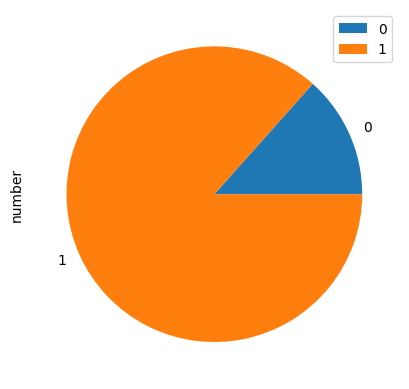

In [31]:
df_count.plot(x ='category', y='number', kind = 'pie')
plt.show()

In [25]:
stemmer = PorterStemmer()
corpus = []
for w in range(len(df['Message'])):
    msg = df['Message'][w]
    msg = re.sub("[^a-zA-Z]", " ", msg)
    msg = re.sub("\b[a-zA-Z]\b", " ", msg)
    msg = msg.lower()
    msg = msg.split()
    msg = [stemmer.stem(word) for word in msg if not word in set(stopwords.words('english'))]
    msg = " ".join(msg)
    corpus.append(msg)


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
tf.fit(corpus)
print('tfidf : ',tf.vocabulary_)
X = tf.transform(corpus).toarray()
print('x : ',X)
Y = df['Category']
print('y : ',Y)

tfidf :  {'go': 2171, 'jurong': 2827, 'point': 4091, 'crazi': 1169, 'avail': 379, 'bugi': 738, 'great': 2245, 'world': 6135, 'la': 2932, 'buffet': 736, 'cine': 964, 'got': 2208, 'amor': 190, 'wat': 5957, 'ok': 3760, 'lar': 2960, 'joke': 2794, 'wif': 6056, 'oni': 3785, 'free': 2007, 'entri': 1673, 'wkli': 6101, 'comp': 1058, 'win': 6067, 'fa': 1791, 'cup': 1220, 'final': 1890, 'tkt': 5536, 'st': 5103, 'may': 3276, 'text': 5420, 'receiv': 4402, 'question': 4319, 'std': 5131, 'txt': 5695, 'rate': 4364, 'appli': 262, 'dun': 1551, 'say': 4651, 'earli': 1568, 'hor': 2477, 'alreadi': 163, 'nah': 3532, 'think': 5468, 'goe': 2175, 'usf': 5811, 'live': 3070, 'around': 302, 'though': 5485, 'freemsg': 2013, 'hey': 2408, 'darl': 1267, 'week': 5992, 'word': 6129, 'back': 414, 'like': 3042, 'fun': 2059, 'still': 5152, 'tb': 5367, 'xxx': 6202, 'chg': 922, 'send': 4721, 'rcv': 4375, 'even': 1722, 'brother': 710, 'speak': 5037, 'treat': 5638, 'aid': 118, 'patent': 3936, 'per': 3972, 'request': 4473, 'me

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [28]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train, y_train)
y_pred = model.predict(X_test)


In [29]:
from sklearn.metrics import confusion_matrix
confusion_m = confusion_matrix(y_test, y_pred)
print(confusion_m)

[[955   0]
 [ 34 126]]


In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)


print("acc", acc, "\n")
print("prec", prec, "\n")
print("rec", rec, "\n") #low due to imbalance data. ham datas are many more than spams.

acc 0.9695067264573991 

prec 1.0 

rec 0.7875 

